# CUSTOMER DEFECTION ANALYSIS

Customer defection is the loss of clients or customers. 
Telephone service companies, ISPs, insurance firms, etc, often use customer defection analysis and rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one.  
Companies usually make a distinction between voluntary defection (churn) and involuntary defection (churn). Voluntary defection occurs due to a decision by the customer to switch to another company or service provider, involuntary defection occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. 

In this analysis, involuntary reasons for churn will be excluded from the analytical models. We will instead tend to concentrate on voluntary defection, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided. 

Our team was presented with data from a telco company and tasked to analyse the data and gain insight into customer defection as-well-as develop a model that will predict the possibility of defection by any customer.

The DataSet did not come with a data dictionary, but we used general knowledge to interpret the columns and came up with this dictionary for the purpose of this project;


`customerID`- Unique identifiers for the customers.

`gender`- Female and Male.

`SeniorCitizen`- 0 if the customer is not a senior citizen else 1 (int64).

`Partner`- Yes if the customer has a partner else No.

`Dependents` - Yes if the customer has people that depend on them else No.

`tenure` - How long the customers have been with the company in months(int64).

`PhoneService` - Yes for customers that have phone service else No.

`MultipleLines` - Yes for customers with Multiple lines. 
                - No for customers with single phone lines.
                - No phone services for customers without phone service.

`InternetService` - Fiber optic
                  - DSL- Digital Subscriber Line
                  - No

`OnlineSecurity` - Yes for customers with online security
                 - No for customers without online security
                 - No phone services for customers without phone service.

`OnlineBackup` - Yes for customers with online backup
               - No for customers without online backup
               - No phone services for customers without phone service.

`DeviceProtection` - Yes for customers with device protection
                   - No for customers without device protection
                   - No phone services for customers without phone service.

`TechSupport` - Yes for customers with access to tech support
              - No for customers without access to tech support
              - No phone services for customers without phone service.

`StreamingTV` - Yes for customers that have Streaming TV
              - No for customers without Streaming TV
              - No phone services for customers without phone service.

`StreamingMovies` - Yes for customers that stream movies
                  - No for customers that don’t stream movies
                  - No phone services for customers without phone service.

`Contract` - Month-to-month: Customers that renew their contract monthly
           - Two year: Customers that renew their contract every two years
           - One year: Customers that renew their contract every year
`PaperlessBilling` - Yes for customers that handle their billings online
                   - No for customers that do not handle their billings online

`PaymentMethod` - Electronic check: Customers that handle payment via electronic cheque 
                - Mailed check: Customer that handle payment by mail
                - Bank transfer (automatic):  Customers that pay automatically via bank transfer
                - Credit card (automatic): Customers that pay automatically via their credit cards

`MonthlyCharges` - The monthly charge for each customer (float64)

`TotalCharges` - The total charge for each customer taking into consideration their contract. (float64)

`Churn` - Yes for customers that are lost and No for retained customers.
        Context:The churn rate also known as the rate of attrition or customer churn is the rate at which customers stop                       doing business with an entity.




In [2]:
#importing libraries that may be needed during the course of this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Reading in the DataSet

In [3]:
cust_data = pd.read_csv('C:\\Users\\hp\\Desktop\\DataQuest\\My Data Sets\\WA_Fn-UseC_-Telco-Customer-Churn.csv')


## Exploratory Data Analysis

In [4]:
cust_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
cust_data.shape


(7043, 21)

We have 7,043 rows and 21 columns in the dataset.

In [6]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

From the EDA performed on the data set, it appears the dataset is cleaned and does not have any null objects. However, it can be seen that `TotalCharges` column is an object type and we will need to convert it float to enable us perform some analysis on that column.

In [7]:
#Display all the columns names

cust_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#converting TotalCharges column to float.

cust_data['TotalCharges'] = cust_data['TotalCharges'].replace(' ', 0).astype(float)

In [9]:
#displays the distribution of the numerical data in the dataset.

cust_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


A look at the distribution above shows that the highest tenure for any customer in the dataset is 72 months and the lowest is 0, which means there are customers who spent less than a month with the company. It can also be seen that some customers has monthly charges as high as 118.75usd while the minimum monthly charge is 18.25usd. Next, we will be looking at the correlation between these numerical data to see if there's any strong relationship between the columns.

In [10]:
#Looking at correlation between the numerical data

num_corr = cust_data.corr()
num_corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


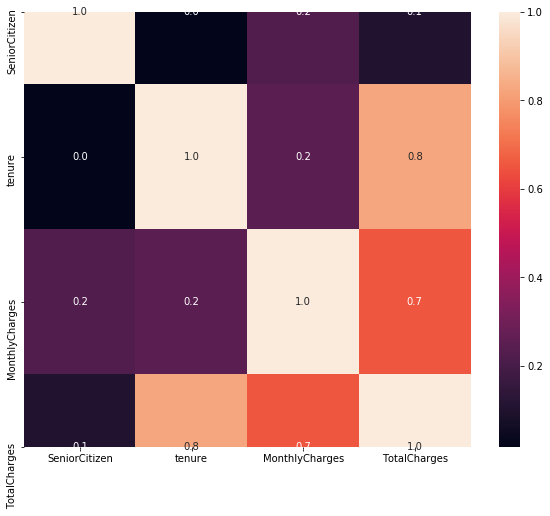

In [11]:
#Let's visualize the above correlation as follows;

plt.figure(figsize=(10, 8))
sns.heatmap(cust_data.corr(), annot=True, fmt='.1f')

From the correlation heatmap above, the only correlation worthy of comment is that between tenure and TotalCharges, which has a very strong positive correlation, this is expected because the longer a customer stays with the company, the higher the TotalCharges. We will look more closely at the relationship with a scatter diagram below;

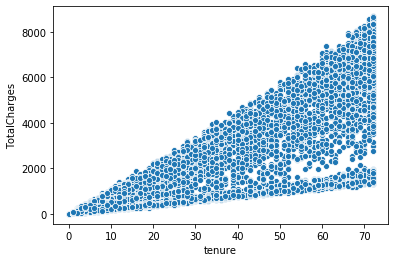

In [12]:
sns.scatterplot(x='tenure', y='TotalCharges', data=cust_data)

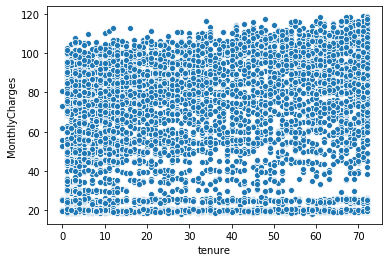

In [13]:
sns.scatterplot(x='tenure', y='MonthlyCharges', data=cust_data)

From the plots above, it does not look like we have any positive correlation between `tenure` and `MonthlyCharges`. However there is a very strong positive correlation between `tenure` and `TotalCharges`. Next, we will be looking at the number of customers that churned.

In [14]:
#get the number or churned customers

cust_retained = cust_data[cust_data['Churn'] == 'No']
cust_churned = cust_data[cust_data['Churn'] == 'Yes']

num_cust = cust_data.shape[0]
num_retained = cust_retained.shape[0]
num_churned = cust_churned.shape[0]

print('Total Number of Customers', ':', num_cust, '\n')
print('Total Retained Customers', ':', num_retained, '\n')
print('Total Churned Customers', ':', num_churned)

Total Number of Customers : 7043 

Total Retained Customers : 5174 

Total Churned Customers : 1869


In [15]:
#Calculate the percentage of churned and retained customers

retained_per = (num_retained/num_cust)*100
churned_per = (num_churned/num_cust)*100

print('% of Retained Customers', ':', retained_per, '\n')
print('% of Churned Customers', ':', churned_per)

% of Retained Customers : 73.4630129206304 

% of Churned Customers : 26.536987079369588


5174 customers which represent 73.46% stayed with the company while 1869 customers which represents 26.54% left the company in the period under review.
This is very important information as we proceed in this project and most importantly in our prediction model. Because our model will be predicting the likelihood of a customer to be retained by the company, it is important to note that our model must have an accuracy of above 75% to have any meaningful impact because without any model, we already have a 73.46% chance of predicting customers likely to stay just by taking a wild guess.

Let's visualize the churn column below;

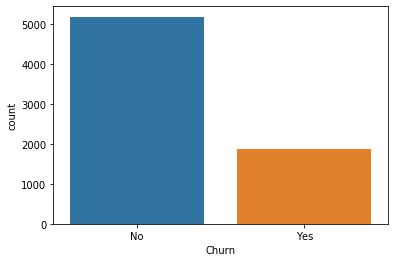

In [16]:
#visualize the Churn column

sns.countplot(cust_data['Churn'])

Next we will be looking at the churn count by some other columns in the dataset to see which columns has the most impact on the churn rate. First let's look at the relationship between the following columns; `gender`, `SeniorCitizen`, `Partner`, `Dependents` and the churn rate.

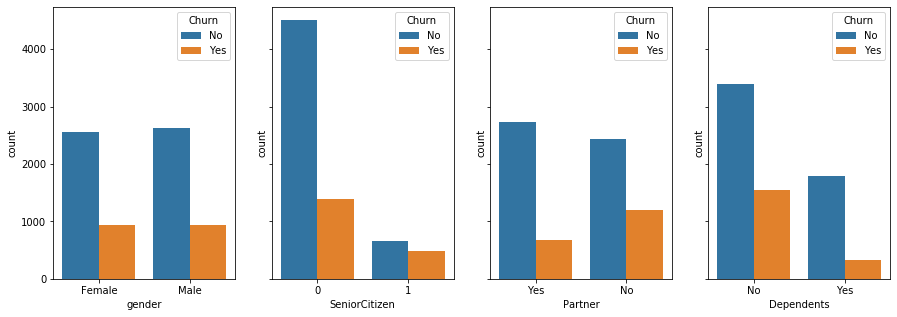

In [17]:
fig, ax = plt.subplots(1, 4, sharey='all', figsize=(15,5))
sns.countplot(x='gender', hue='Churn', data=cust_data, ax=ax[0])
sns.countplot(x='SeniorCitizen', hue='Churn', data=cust_data, ax=ax[1])
sns.countplot(x='Partner', hue='Churn', data=cust_data, ax=ax[2])
sns.countplot(x='Dependents', hue='Churn', data=cust_data, ax=ax[3])


We can make the following assumptions from the plot above;

- `gender` has no significant role to play in the churn rate of the customer
- The `SeniorCitizen` plot shows that despite the low number of customers who are senior citizens, they are still more likely to churn.
- `Partner` plot shows that customers with partner are less likely to churn
- `Dependents` plot also shows that customers with dependents are less likely to churn than those with no dependents.

Next we will look at the next set of categorical data; `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity` and see if they have any visible effect on the churn rate.

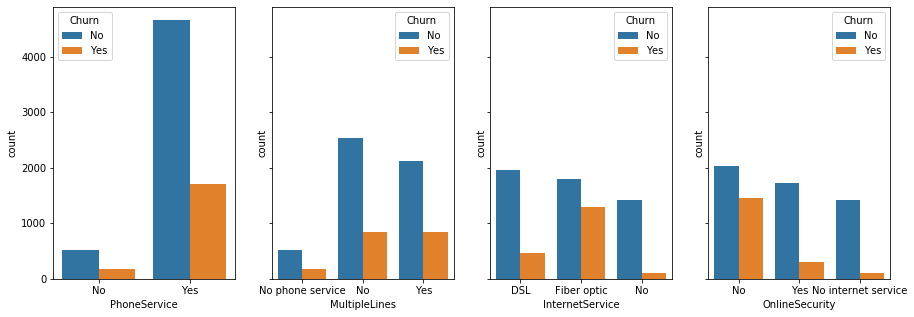

In [18]:
fig, ax = plt.subplots(1, 4, sharey='all', figsize=(15,5))
sns.countplot(x='PhoneService', hue='Churn', data=cust_data, ax=ax[0])
sns.countplot(x='MultipleLines', hue='Churn', data=cust_data, ax=ax[1])
sns.countplot(x='InternetService', hue='Churn', data=cust_data, ax=ax[2])
sns.countplot(x='OnlineSecurity', hue='Churn', data=cust_data, ax=ax[3])

The following assumptions can be made from the plots above;

- `PhoneService`- Customers who subscribed to phone service are more and also more likely to churn
- `MultipleLines` - This plot shows no significant relationship with the churn rate, although customers with multiple lines are slightly more likely to churn than than the other categories.
- `InternetService` - This plot shows that customers who uses Fiber optic internet service are very much likely to churn than customers who uses DSL or does not use Internet service. This is very significant as it may mean there's an issue with the Fiber optic internet service or that the service is over-priced thereby causing customer churn.
- `OnlineSecurity` - This is also very interesting, as customers who do not have online security are very much likely to churn than others. It means the company needs to engage customers to use online security.

The next set of categorical data we will be looking at are `OnlineBackup`, `DeviceProtection`, `TechSupport`,`StreamingTV`

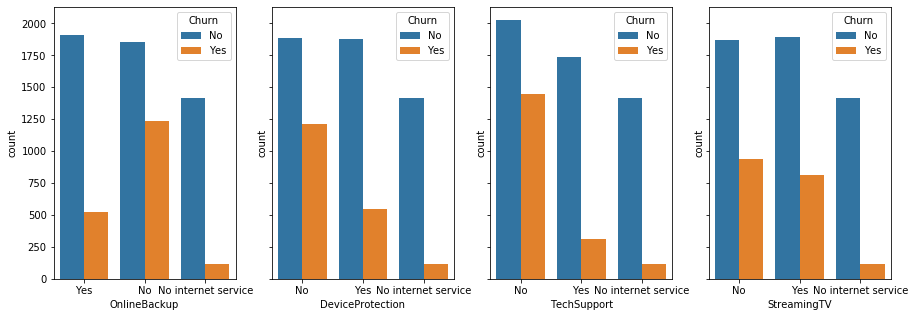

In [19]:
fig, ax = plt.subplots(1, 4, sharey='all', figsize=(15,5))
sns.countplot(x='OnlineBackup', hue='Churn', data=cust_data, ax=ax[0])
sns.countplot(x='DeviceProtection', hue='Churn', data=cust_data, ax=ax[1])
sns.countplot(x='TechSupport', hue='Churn', data=cust_data, ax=ax[2])
sns.countplot(x='StreamingTV', hue='Churn', data=cust_data, ax=ax[3])

The figure above shows that customers with **NO** `OnlineBackup`, `DeviceProtection`, `TechSupport` are much more likely to churn. It means the Telco is deficient in making sure their customers have all these services which has led to a high rate of dissatisfaction  within customers thereby causing a high churn rate. The last plot `StreamingTV` shows no significant contribution to the churn rate, although customers who stream TV are slightly less likely to churn.

Next we will look at the last set of categorical datas in our dataset; `StreamingMovies`, `Contract`, `PaperlessBilling`, `PaymentMethod`

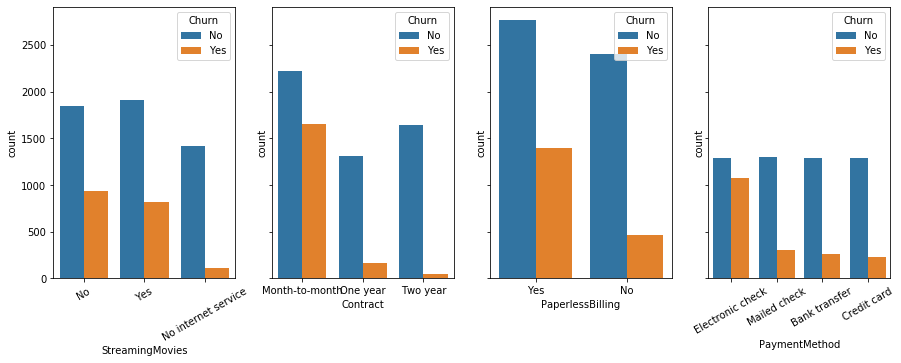

In [20]:
fig, ax = plt.subplots(1, 4, sharey='all', figsize=(15,5))

stream = sns.countplot(x='StreamingMovies', hue='Churn', data=cust_data, ax=ax[0])
label = ['No', 'Yes', 'No internet service']
stream.set_xticklabels(label, rotation=30)

contract = sns.countplot(x='Contract', hue='Churn', data=cust_data, ax=ax[1])

billing = sns.countplot(x='PaperlessBilling', hue='Churn', data=cust_data, ax=ax[2])

payment = sns.countplot(x='PaymentMethod', hue='Churn', data=cust_data, ax=ax[3])

labels = ['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card']
payment.set_xticklabels(labels, rotation=30);

We can make the following deductions from the figure above;

- `StreamingMovies` - This plot shows the same pattern as the `StreamingTV` plot because both requires internet use
- `Contract` - The plot shows that customers with Month-to-month subscription are much more likely to churn than customers with One year and Two year contracts. This is not too surprising as customer with longer contract may find it more difficult to leave than customers with monthly subscription who can leave at the end of their subscription if they are dissatisfied.
- `PaperlessBilling` - Customer with paperless billing are more likely to churn than those who don't use paperless billing.
- `PaymentMethod` - It can be seen that customers who make payments via electronic check seems to have a very high churn rate than customers who use other forms of payment. This is expected as customers who uses an automatic mode of payment are less likely to churn than customer who will have to send in their payment check either by mail or electronically. So it will be advisable for the Telco to ensure that customer uses the automatic payment method.

So far we have been looking at how the categorical data affect the churn rate. Next we will be looking at the numerical columns and visualizing them to see how they affect the churn rate. To do this we will be using a histogram plot to visualze how the `tenure` and `MonthlyCharges` relate with the churn rate.


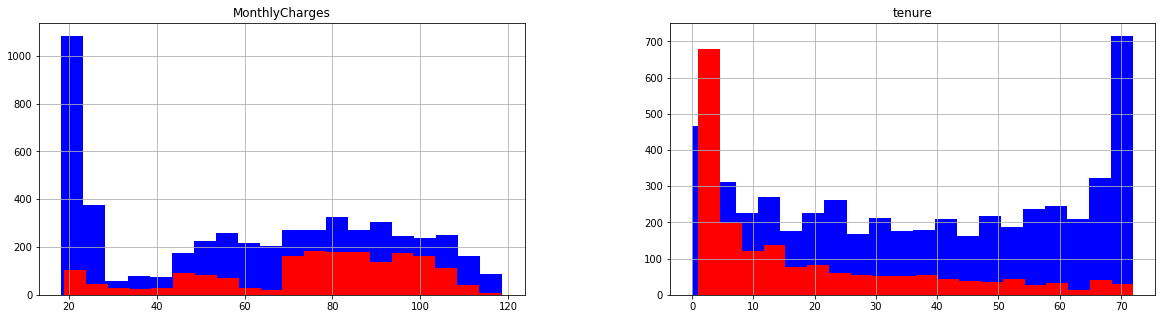

In [21]:
num_cols = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
retained = cust_data[cust_data['Churn'] == 'No'][num_cols]
churned = cust_data[cust_data['Churn'] == 'Yes'][num_cols]

retained.hist(bins=20, color='blue', ax=ax)
churned.hist(bins=20, color='red', ax=ax);

From the `MonthlyCharges` histogram, customers who pay monthly charges of between 20-30usd are the most likely to be retained while majority of churned customers are within 70-100usd monthly charges. We will have to explore these more closely to check the services rendered to customer who pay between 70-100usd monthly to be able to fully understand why they tend to leave. From a glance at this histogram, we can conclude that customers who pay higher monthly charge are more likely to leave. It is recommended that the Telco should look to review their monthly charge to retain some of these customers.

A look at the `tenure` histogram shows that customers who are more likely to churn have a tenure of between 1-7months. It seems customer who have stayed longer with the company are less likely to leave. So it will be advised that the Telco try to keep their new customer for a minimum period of 2 years to ensure they are less likely to leave.

## Data Processing and Cleaning

Here we will be doing some data cleaning and processing to prepare our dataset for the prediction algorithm. The dataset given came cleaned and we do not have to perform many cleaning procedures on the data. For the purpose of this project, the `customerID` will not have any input to our prediction model, so we will be dropping that column.

In [22]:
#import needed libraries

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
#dropping unnecessary column

cleaned_data = cust_data.drop('customerID', axis=1)

cleaned_data.shape

(7043, 20)

We can see that we now have 20 columns as opposed to the 21 columns in the original data. 
Next we will convert all the categorical columns to numeric because we can not do any calculation with strings. I will be using the pandas function 'get_dummies' to make the conversion. This function will split each columns according to the number of unique values in the column and create a column of these values in numerical values. For example the gender column will be splitted into gender_male and gender_Female.

In [24]:
#To convert all the categorical columns to numerical and creating a dummy

cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
num_data = pd.get_dummies(cleaned_data, prefix=None, prefix_sep='_', columns=cols, drop_first=False)

In [25]:
num_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
SeniorCitizen,0,0,0,0,0,0,0,0,0,0
tenure,1,34,2,45,2,8,22,10,28,62
MonthlyCharges,29.85,56.95,53.85,42.3,70.7,99.65,89.1,29.75,104.8,56.15
TotalCharges,29.85,1889.5,108.15,1840.75,151.65,820.5,1949.4,301.9,3046.05,3487.95
Churn,No,No,Yes,No,Yes,Yes,No,No,Yes,No
gender_Female,1,0,0,0,1,1,0,1,1,0
gender_Male,0,1,1,1,0,0,1,0,0,1
Partner_No,0,1,1,1,1,1,1,1,0,1
Partner_Yes,1,0,0,0,0,0,0,0,1,0
Dependents_No,1,1,1,1,1,1,0,1,1,0


Next we will be splitting our dataset into a training(80%) and test(20%) set, but before that we will assign the independent variables to `X` while the dependent variable(churn) will be assigned to `Y`

In [26]:
#Scale the cleaned data
X = num_data.drop('Churn', axis = 1) 
Y = num_data['Churn']

#Standardizing/scaling the features
x = StandardScaler().fit_transform(X)

In [27]:
#Split the data into 80% training and 20% testing

x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

Next I will be applying the logistic regression model to the dataset and then train the dataset.

In [28]:
#Create the model
model = LogisticRegression()

In [29]:
#Train the model
result = model.fit(x_train, y_train)
result

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

With the trained dataset above, we can now predict if a customer `churned` or not in our test dataset. The results are stored in `prediction_test`

In [30]:
prediction_test = model.predict(x_test)

print(prediction_test)

['Yes' 'No' 'No' ... 'No' 'No' 'No']


In [31]:
#Check precision, recall, f1-score

print( classification_report(y_test, prediction_test) )

              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



Above, we printed the classification report to measure the quality of predictions from our classification algorithm. We can see that the precision of our algorithm to predict the number of customers who was retained is `86%` while for customers who churned is `68%`. This shows that our algorithm is doing very well considering that earlier I stated that our algorithm should do better than the percentage of retained(73.5%) and churned(26.5) customers in the original dataset.

Below we can see the overall accuracy of this prediction model which is `82%`. This is quite good especially when we look at the impact each independent variable has on the dependent variable; `Churn`

In [32]:
from sklearn import metrics

# Print the prediction accuracy

print (metrics.accuracy_score(y_test, prediction_test))

0.8204400283889283


So with the final objective to reduce customers who churn and recommend the right preventive actions to the Telco, let us look at the influence of each independent variable on the prediction outcome. To do this, we set the model coefficients to zero and look at the weight of each variable.

In [33]:
# To get the weights of all the variables

weights = pd.Series(model.coef_[0], index=X.columns.values)
weights.sort_values(ascending = False)

TotalCharges                               0.647502
InternetService_Fiber optic                0.349074
Contract_Month-to-month                    0.308914
StreamingMovies_Yes                        0.159128
StreamingTV_Yes                            0.134442
OnlineSecurity_No                          0.119105
PaymentMethod_Electronic check             0.118934
TechSupport_No                             0.100588
MultipleLines_Yes                          0.086954
PaperlessBilling_Yes                       0.081802
OnlineBackup_No                            0.060606
SeniorCitizen                              0.058851
DeviceProtection_Yes                       0.055825
Dependents_No                              0.036481
DeviceProtection_No                        0.024361
OnlineBackup_Yes                           0.017957
Partner_Yes                                0.013813
gender_Female                              0.012777
PhoneService_No                            0.002507
MultipleLine

    We can observe that some variables has a positive relationship to our predicted variable while some have a negative relation. The positive relationship to churn means that this variable increase the probability of a customer to churn while a negative relation means the customer is a lot less likely to churn. Looking at the result above, we can see that customers with fiber optic internet service and month-to-month contract are a lot more likely to churn. This is interesting as it will be expected that customers who use fiber optic internet which is supposed to be very fast will be less likely to churn. We will have to look deeper into this to get some context into the data. 